## Sentiment Analysis of News for a particular stock

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

current_date = datetime.now().strftime("%Y-%m-%d")  # Get the current date in "YYYY-MM-DD" format
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['GOOG']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')

    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    break

key = next(iter(news_tables))
stock_data = news_tables[key]
stock_rows = stock_data.findAll('tr')
parsed_data = []
prev_date = None
for index, row in enumerate(stock_rows):
    title_ = row.a
    if title_:
        title = title_.text
    timestamp_ = row.td
    if timestamp_:
        timestamp = timestamp_.text
        date_data = [data.strip() for data in timestamp.split(" ") if data.strip()]  # Remove empty strings
        # print(date_data)
        # print(len(date_data))
        if len(date_data) == 1:
            time = date_data[0]
            date = prev_date
        else:
            date = date_data[0]
            if date != "Today":
                date = datetime.strptime(date_data[0], "%b-%d-%y").strftime("%Y-%m-%d")
                prev_date = date
            else:
                date = current_date
                prev_date = current_date
            time = date_data[1]

    parsed_data.append([key,date,time,title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
vader = SentimentIntensityAnalyzer()
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'] if title else 0)
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

In [2]:
df["time"] = df["time"].str.replace("AM", "").str.replace("PM", "")
df

,ticker,date,time,title,compound
0,GOOG,2023-09-23,09:44,30 Low Cost Business Ideas With High Profit,0.2023
1,GOOG,2023-09-23,07:35,Google's Startling Admission Confirms What Inv...,-0.1531
2,GOOG,2023-09-23,06:14,25 Most Mentally Stimulating Jobs According to...,0.4902
3,GOOG,2023-09-23,05:50,Which Top Artificial Intelligence (AI) Stock C...,0.5994
4,GOOG,2023-09-23,05:31,25 High Paying Jobs That Dont Require Math,0.0000
...,...,...,...,...,...
98,GOOG,2023-09-19,10:14,Google wants part of antitrust trial kept out ...,0.0000
99,GOOG,2023-09-19,09:56,Microsoft Eyes Apples Spot as Worlds Largest S...,0.0000
100,GOOG,2023-09-19,08:07,Dont Fret the Fed. Buy Meta and These Stocks a...,0.0000
101,GOOG,2023-09-19,06:38,10 Best Ad-tech Stocks To Buy Now,0.6369


## Graph shows the trend in news data for a particular stock based on Vader sentiment analyzer

<Figure size 1000x800 with 0 Axes>

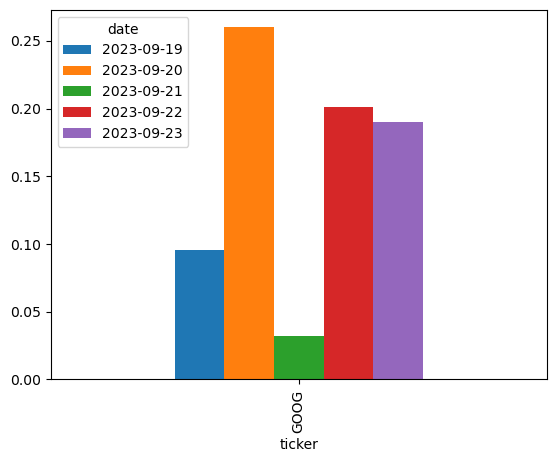

In [3]:
plt.figure(figsize=(10,8))
df['compound'] = pd.to_numeric(df['compound'], errors='coerce')
mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()
# Plot the data
mean_df.plot(kind='bar')
plt.show()

Enter the stock ticker (e.g., GOOG): AMZN
    ticker        date   time  \
0     AMZN  2023-09-23  03:44   
1     AMZN  2023-09-23  10:50   
2     AMZN  2023-09-23  10:00   
3     AMZN  2023-09-23  09:24   
4     AMZN  2023-09-23  08:30   
..     ...         ...    ...   
98    AMZN  2023-09-20  05:14   
99    AMZN  2023-09-20  02:20   
100   AMZN  2023-09-19  06:03   
101   AMZN  2023-09-19  06:03   
102   AMZN  2023-09-19  05:04   

                                                 title  compound  
0           Amazon and Target gives shoppers good news    0.5574  
1           Who Owns Amazon? Top Shareholders & Owners    0.3612  
2                                 Is Amazon a Buy Now?    0.1779  
3    Amazon and Target give Americans an early Chri...    0.5574  
4              2 Warren Buffett Stocks to Hold Forever    0.0000  
..                                                 ...       ...  
98   Billionaire Ken Griffin Is Getting Anxious Abo...   -0.1280  
99                       

<Figure size 1000x800 with 0 Axes>

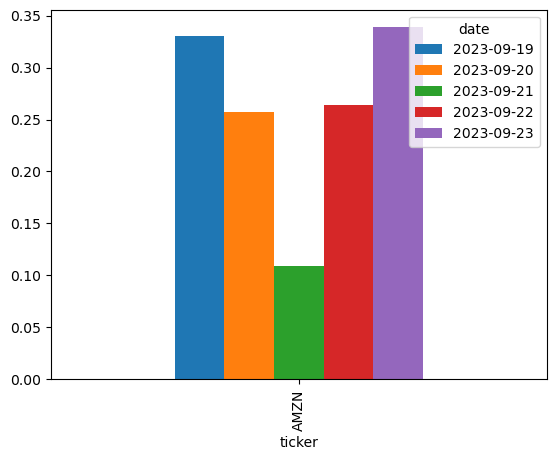

In [4]:
# text_classifier.py

import pandas as pd
import re
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt

def get_stock_data(ticker):
    current_date = datetime.now().strftime("%Y-%m-%d")
    finviz_url = 'https://finviz.com/quote.ashx?t='

    news_tables = {}
    
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

    key = ticker
    stock_data = news_tables[key]
    stock_rows = stock_data.findAll('tr')
    parsed_data = []
    prev_date = None
    for index, row in enumerate(stock_rows):
        title_ = row.a
        if title_:
            title = title_.text
        timestamp_ = row.td
        if timestamp_:
            timestamp = timestamp_.text
            date_data = [data.strip() for data in timestamp.split(" ") if data.strip()]
            if len(date_data) == 1:
                time = date_data[0]
                date = prev_date
            else:
                date = date_data[0]
                if date != "Today":
                    date = datetime.strptime(date_data[0], "%b-%d-%y").strftime("%Y-%m-%d")
                    prev_date = date
                else:
                    date = current_date
                    prev_date = current_date
                time = date_data[1]

        parsed_data.append([key, date, time, title])

    df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
    vader = SentimentIntensityAnalyzer()
    df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'] if title else 0)
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
    df["time"] = df["time"].str.replace("AM", "").str.replace("PM", "")

    return df



def plot_sentiment(ticker):
    df = get_stock_data(ticker)
    plt.figure(figsize=(10, 8))
    df['compound'] = pd.to_numeric(df['compound'], errors='coerce')
    mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()
    mean_df.plot(kind='bar')
    print(df)
    plt.show()

def main():
    ticker = input("Enter the stock ticker (e.g., GOOG): ")
    plot_sentiment(ticker)

if __name__ == '__main__':
    main()


In [5]:
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt
import pickle

class StockSentimentClassifier:
    def __init__(self,ticker):
        self.vader = SentimentIntensityAnalyzer()
        self.ticker = ticker

    def get_stock_data(self, ticker):
        current_date = datetime.now().strftime("%Y-%m-%d")
        finviz_url = 'https://finviz.com/quote.ashx?t='

        news_tables = {}

        url = finviz_url + ticker
        req = Request(url=url, headers={'user-agent': 'my-app'})
        response = urlopen(req)
        html = BeautifulSoup(response, features='html.parser')
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table

        key = ticker
        stock_data = news_tables[key]
        stock_rows = stock_data.findAll('tr')
        parsed_data = []
        prev_date = None
        for index, row in enumerate(stock_rows):
            title_ = row.a
            if title_:
                title = title_.text
            timestamp_ = row.td
            if timestamp_:
                timestamp = timestamp_.text
                date_data = [data.strip() for data in timestamp.split(" ") if data.strip()]
                if len(date_data) == 1:
                    time = date_data[0]
                    date = prev_date
                else:
                    date = date_data[0]
                    if date != "Today":
                        date = datetime.strptime(date_data[0], "%b-%d-%y").strftime("%Y-%m-%d")
                        prev_date = date
                    else:
                        date = current_date
                        prev_date = current_date
                    time = date_data[1]

            parsed_data.append([key, date, time, title])

        df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
        df['compound'] = df['title'].apply(lambda title: self.vader.polarity_scores(title)['compound'] if title else 0)
        df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
        df["time"] = df["time"].str.replace("AM", "").str.replace("PM", "")

        return df

    def plot_sentiment(self, ticker):
        df = self.get_stock_data(ticker)
        plt.figure(figsize=(10, 8))
        df['compound'] = pd.to_numeric(df['compound'], errors='coerce')
        mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()
        mean_df.plot(kind='bar')
        return df, plt

    def save_sentiment_model(self, filename='sentiment_model.pkl'):
        # Save the sentiment analysis model to a pickle file
        with open(filename, 'wb') as model_file:
            pickle.dump(self.vader, model_file)

if __name__ == '__main__':
    ticker = input("Enter the stock ticker symbol: ")
    classifier = StockSentimentClassifier(ticker)
    classifier.save_sentiment_model()


Enter the stock ticker symbol: AMZN


(    ticker        date   time  \
 0     AMZN  2023-09-23  03:44   
 1     AMZN  2023-09-23  10:50   
 2     AMZN  2023-09-23  10:00   
 3     AMZN  2023-09-23  09:24   
 4     AMZN  2023-09-23  08:30   
 ..     ...         ...    ...   
 98    AMZN  2023-09-20  05:14   
 99    AMZN  2023-09-20  02:20   
 100   AMZN  2023-09-19  06:03   
 101   AMZN  2023-09-19  06:03   
 102   AMZN  2023-09-19  05:04   
 
                                                  title  compound  
 0           Amazon and Target gives shoppers good news    0.5574  
 1           Who Owns Amazon? Top Shareholders & Owners    0.3612  
 2                                 Is Amazon a Buy Now?    0.1779  
 3    Amazon and Target give Americans an early Chri...    0.5574  
 4              2 Warren Buffett Stocks to Hold Forever    0.0000  
 ..                                                 ...       ...  
 98   Billionaire Ken Griffin Is Getting Anxious Abo...   -0.1280  
 99                       10 Best Large-Cap Gr

<Figure size 1000x800 with 0 Axes>

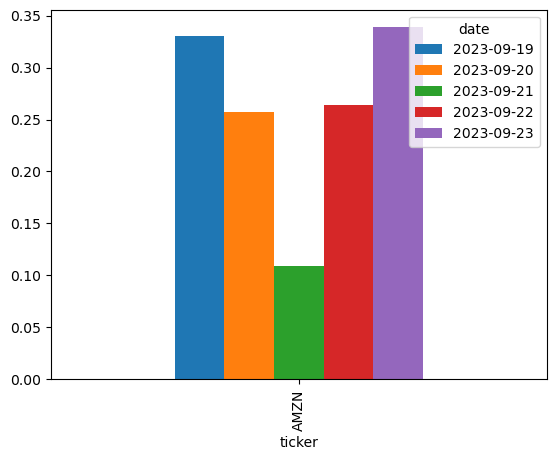

In [6]:
classifier.plot_sentiment(ticker)

In [ ]:
from flask import Flask, render_template, request
import pickle
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

app = Flask(__name__)

def myget_stock_data(ticker):
        current_date = datetime.now().strftime("%Y-%m-%d")
        finviz_url = 'https://finviz.com/quote.ashx?t='

        news_tables = {}

        url = finviz_url + ticker
        req = Request(url=url, headers={'user-agent': 'my-app'})
        response = urlopen(req)
        html = BeautifulSoup(response, features='html.parser')
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table

        key = ticker
        stock_data = news_tables[key]
        stock_rows = stock_data.findAll('tr')
        parsed_data = []
        prev_date = None
        for index, row in enumerate(stock_rows):
            title_ = row.a
            if title_:
                title = title_.text
            timestamp_ = row.td
            if timestamp_:
                timestamp = timestamp_.text
                date_data = [data.strip() for data in timestamp.split(" ") if data.strip()]
                if len(date_data) == 1:
                    time = date_data[0]
                    date = prev_date
                else:
                    date = date_data[0]
                    if date != "Today":
                        date = datetime.strptime(date_data[0], "%b-%d-%y").strftime("%Y-%m-%d")
                        prev_date = date
                    else:
                        date = current_date
                        prev_date = current_date
                    time = date_data[1]

            parsed_data.append([key, date, time, title])

        df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
        df['compound'] = df['title'].apply(lambda title: classifier.polarity_scores(title)['compound'] if title else 0)
        df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
        df["time"] = df["time"].str.replace("AM", "").str.replace("PM", "")

        return df

@app.route('/', methods=['GET', 'POST'])
def indicators():
    stock_list = ['AAPL', 'GOOG', 'TSLA']  # Customize the list of stock tickers

    if request.method == 'POST':
        selected_stock = request.form.get('stock')

        # Call myget_stock_data with the selected stock ticker
        df = myget_stock_data(selected_stock)

        # Render the template with the df object
        return render_template('indicators.html', df=df, selected_stock=selected_stock, stock_list=stock_list)

    return render_template('indicators.html', df=None, selected_stock=None, stock_list=stock_list)
if __name__ == '__main__':
    app.run(debug=True)